In [1]:
! git clone https://github.com/giorgiomelch/SnakeRL

Cloning into 'SnakeRL'...
remote: Enumerating objects: 2439, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 2439 (delta 13), reused 43 (delta 9), pack-reused 2386 (from 1)
Receiving objects: 100% (2439/2439), 40.58 MiB | 24.36 MiB/s, done.
Resolving deltas: 100% (1454/1454), done.


In [12]:
%cd /content/SnakeRL

/content/SnakeRL


In [13]:
import DQN_components as agent_factory
from DQN_components.plotter import plot_trend
import enviroment

pygame 2.6.1 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


# DQN Training
Il notebook si divide in due sezioni: la prima con una rappresentazione di stato semplice, la seconda più complessa. \\\
Ciascun allenamento prevede l'impiego di una diversa tecnica RL in modo che il confronto tra di esse sia semplice.

# Rappresentazione di stato semplice con soli 11 valori

In [ ]:
env = enviroment.LinearStateSnakeGame(visual=False)

Game: 500, Epsilon: 0.000000, Score: 9, Record: 51, Step eseguiti: 89359.  

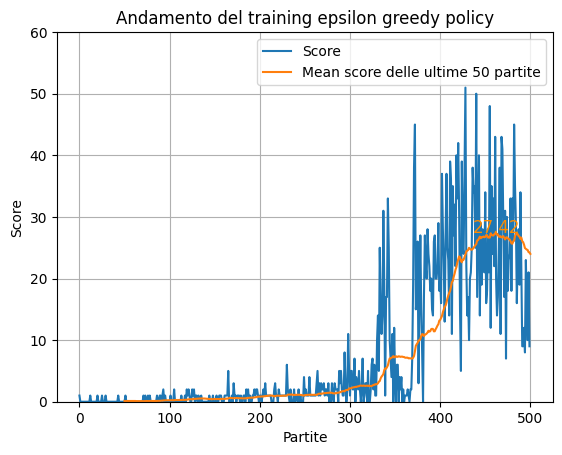

In [ ]:
agent = agent_factory.Agent(enviroment=env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024,
                            model_units=[256], input_shape=env.state_shape, n_actions=env.n_actions)
train_result = agent.train_agent(N_GAME=500, episode_decay=350,
                            directory_path="./DQN_saved_model/easy_state/", file_name_model="model_base_eps.keras")
plot_trend(train_result, extra_title="epsilon greedy policy")

Game: 500, Epsilon: 0.000000, Score: 29, Record: 58, Step eseguiti: 149926. 

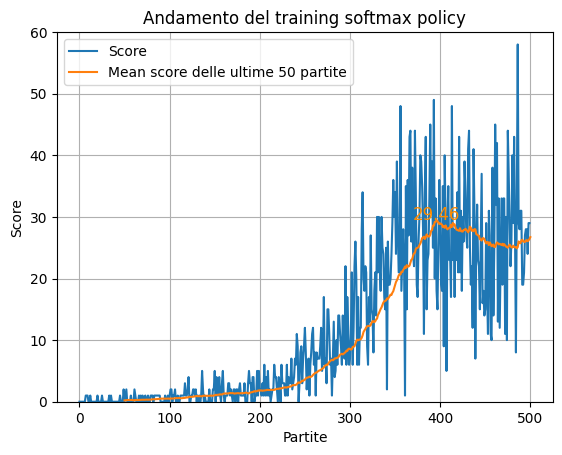

In [ ]:
agent = agent_factory.Agent(enviroment=env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024,
                            model_units=[256], input_shape=env.state_shape, n_actions=env.n_actions)
train_result = agent.train_agent(N_GAME=500, episode_decay=350, eps_greedy=False,
                            directory_path="./DQN_saved_model/easy_state/", file_name_model="model_base_sftmx.keras")
plot_trend(train_result, extra_title="softmax policy")

Game: 500, Epsilon: 0.000000, Score: 46, Record: 51, Step eseguiti: 96275. 

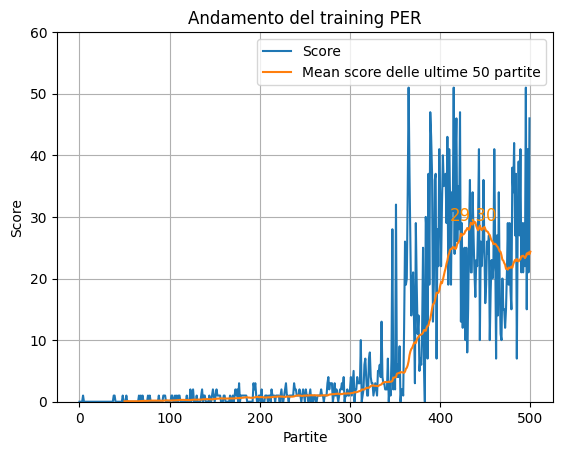

In [ ]:
agent_per = agent_factory.Agent_PER(env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024,
                            model_units=[256], input_shape=[11], n_actions=3)
train_result_per = agent_per.train_agent(N_GAME=500, episode_decay=350,
                            directory_path="./DQN_saved_model/easy_state/", file_name_model="model_PER.keras")
plot_trend(train_result_per, extra_title="PER")

Game: 500, Epsilon: 0.000000, Score: 18, Record: 51, Step eseguiti: 85307. 

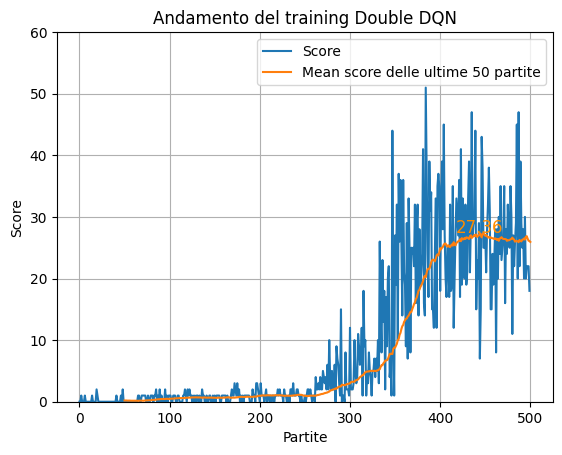

In [ ]:
agent = agent_factory.Agent_DoubleDQN(env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024,
                            model_units=[256], input_shape=[11], n_actions=3)
train_result = agent.train_agent(N_GAME=500, episode_decay=350,
                            directory_path="./DQN_saved_model/easy_state/", file_name_model="model_DDQN.keras")
plot_trend(train_result, extra_title="Double DQN")

Game: 500, Epsilon: 0.000000, Score: 29, Record: 49, Step eseguiti: 89428. 

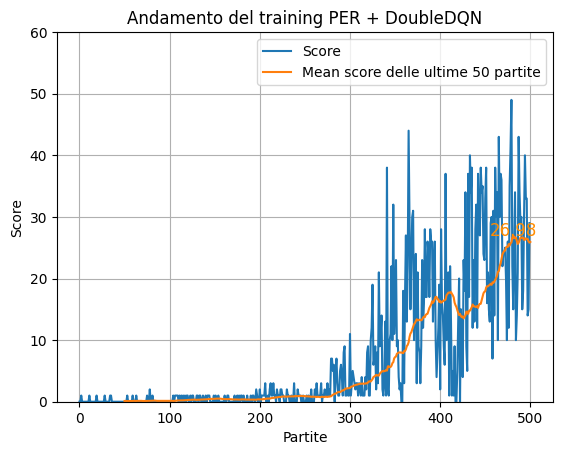

In [ ]:
agent = agent_factory.Agent_DDQN_PER(env, lr=0.001, gamma=0.9, max_memory=50_000, batch_size=1024,
                            model_units=[256], input_shape=[11], n_actions=3)
train_result = agent.train_agent(N_GAME=500, episode_decay=350,
                            directory_path="./DQN_saved_model/easy_state/", file_name_model="model_PER_DDQN.keras")
plot_trend(train_result, extra_title="PER + DoubleDQN")

# Rappresentazione di stato più complessa: una matrice 7x7 al cui centro la testa di snake.

In [14]:
env = enviroment.MatrixStateSnakeGame(visual=False, visual_range=7)

Game: 1000, Epsilon: 0.000000, Score: 31, Record: 67, Step eseguiti: 384547. 

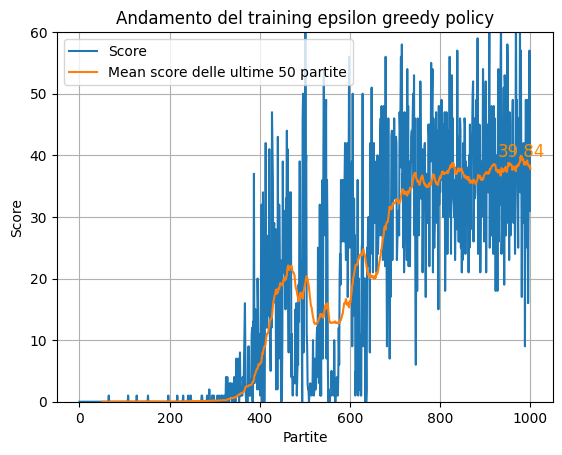

In [15]:
agent = agent_factory.Agent(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024,
                            model_units=[200, 400], input_shape=[53], n_actions=4)
train_result = agent.train_agent(N_GAME=1000, episode_decay=350, eps_greedy=True,
                                 directory_path="./DQN_saved_model/matrix_state/",
                                 file_name_model="bmodel_eps.keras")
plot_trend(train_result, extra_title="epsilon greedy policy")

Game: 1000, Epsilon: 0.000000, Score: 36, Record: 61, Step eseguiti: 425487. 

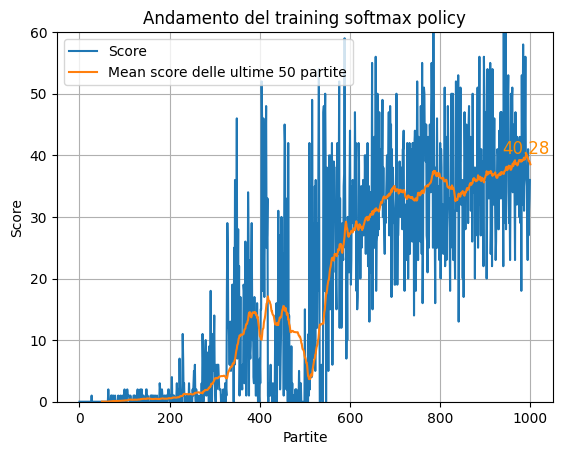

In [ ]:
agent = agent_factory.Agent(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024,
                            model_units=[200, 400], input_shape=[53], n_actions=4)
train_result = agent.train_agent(N_GAME=1000, episode_decay=350, eps_greedy=False,
                                 directory_path="./DQN_saved_model/matrix_state/",
                                 file_name_model="bmodel_sftmx.keras")
plot_trend(train_result, extra_title="softmax policy")

Game: 1000, Epsilon: 0.000000, Score: 47, Record: 74, Step eseguiti: 362992. 

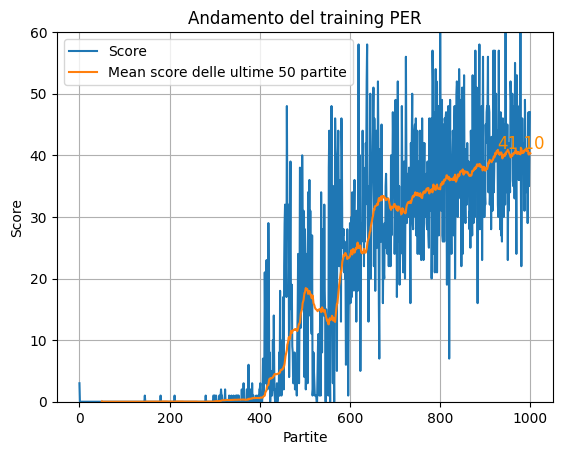

In [17]:
agent = agent_factory.Agent_PER(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024,
                            model_units=[200, 400], input_shape=[53], n_actions=4)
train_result = agent.train_agent(N_GAME=1000, episode_decay=350, eps_greedy=False,
                                 directory_path="./DQN_saved_model/matrix_state/",
                                 file_name_model="bmodel_PER.keras")
plot_trend(train_result, extra_title="PER")

Game: 1000, Epsilon: 0.000000, Score: 42, Record: 81, Step eseguiti: 454751. 

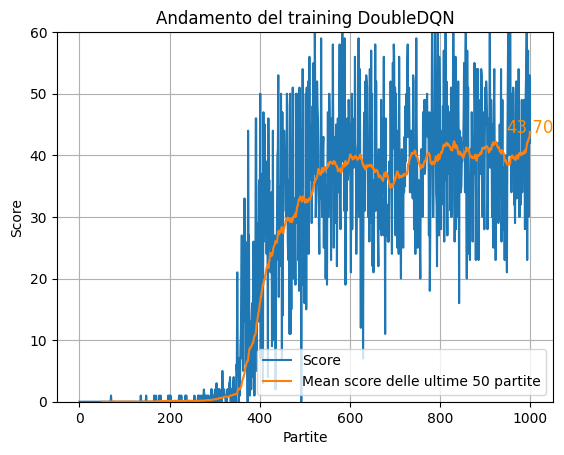

In [ ]:
agent = agent_factory.Agent_DoubleDQN(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024,
                            model_units=[200, 400], input_shape=[53], n_actions=4)
train_result = agent.train_agent(N_GAME=1000, episode_decay=350, eps_greedy=True,
                                 update_target_model=5,
                                 directory_path="./DQN_saved_model/matrix_state/",
                                 file_name_model="bmodel_DDQN.keras")
plot_trend(train_result, extra_title="DoubleDQN")

Game: 1000, Epsilon: 0.000000, Score: 50, Record: 72, Step eseguiti: 381967. 

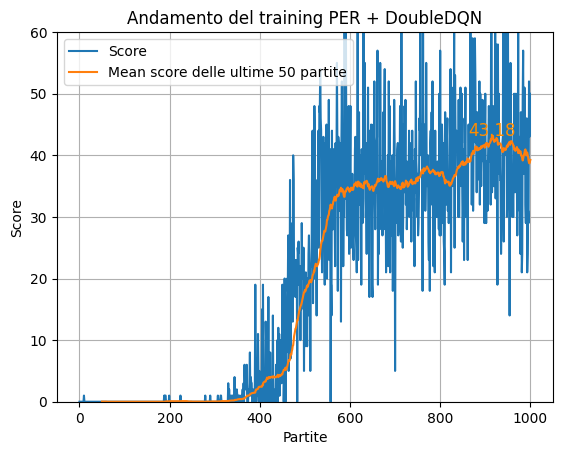

In [ ]:
agent = agent_factory.Agent_DDQN_PER(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024,
                            model_units=[200, 400], input_shape=[53], n_actions=4)
train_result = agent.train_agent(N_GAME=1000, episode_decay=350, eps_greedy=True,
                                 directory_path="./DQN_saved_model/matrix_state/",
                                 file_name_model="bmodel_PER_DDQN_eps.keras")
plot_trend(train_result, extra_title="PER + DoubleDQN")

# Griglia 9x9

In [ ]:
env = enviroment.MatrixStateSnakeGame(visual=False, visual_range=9)

Game: 2000, Epsilon: 0.000000, Score: 53, Record: 83, Step eseguiti: 1232609. 

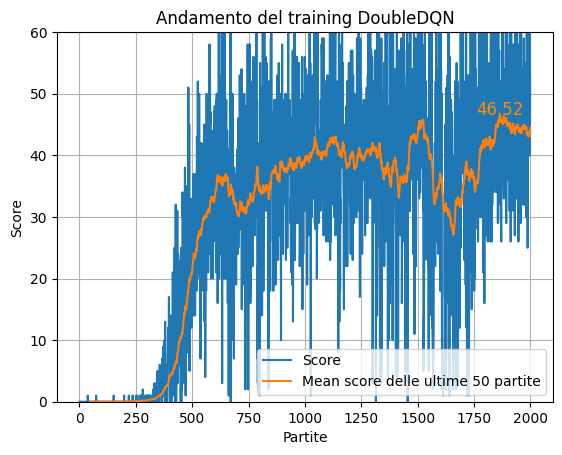

In [ ]:
agent = agent_factory.Agent_DoubleDQN(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024,
                            model_units=[250, 500], input_shape=[85], n_actions=env.n_actions)
train_result = agent.train_agent(N_GAME=2000, episode_decay=350, eps_greedy=True,
                                 update_target_model=5,
                                 directory_path="./DQN_saved_model/matrix_state/",
                                 file_name_model="model_9_DDQN.keras")
plot_trend(train_result, extra_title="DoubleDQN")

Game: 2000, Epsilon: 0.000000, Score: 38, Record: 85, Step eseguiti: 1142865. 

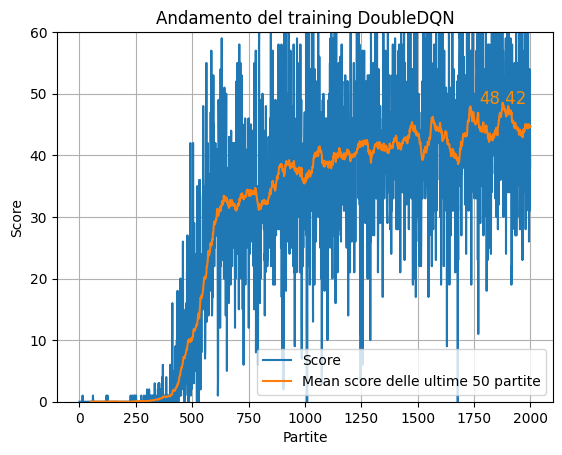

In [ ]:
agent = agent_factory.Agent_DoubleDQN(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024,
                            model_units=[128, 256, 512], input_shape=[85], n_actions=env.n_actions)
train_result = agent.train_agent(N_GAME=2000, episode_decay=350, eps_greedy=True,
                                 update_target_model=5,
                                 directory_path="./DQN_saved_model/matrix_state/",
                                 file_name_model="model_9_3h_DDQN.keras")
plot_trend(train_result, extra_title="DoubleDQN")

Modello caricato con successo da './DQN_saved_model/matrix_state/model_9_3h_DDQN.keras'
Game: 2000, Epsilon: 0.000000, Score: 34, Record: 84, Step eseguiti: 1596580. 

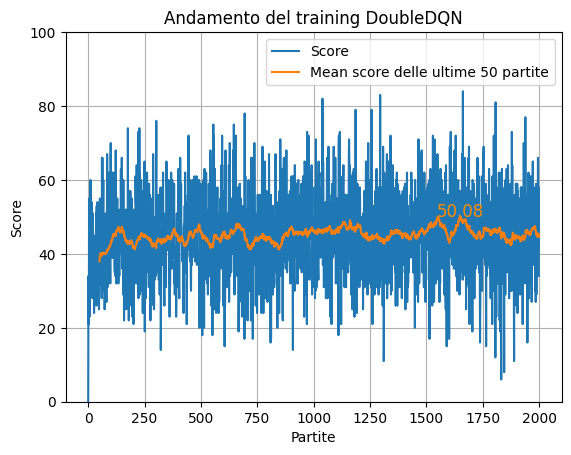

In [ ]:
agent = agent_factory.Agent_DoubleDQN(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024,
                            model_units=[128, 256, 512], input_shape=[85], n_actions=env.n_actions)
agent.dqnetwork.upload_model("./DQN_saved_model/matrix_state/model_9_3h_DDQN.keras")
train_result = agent.train_agent(N_GAME=2000, episode_decay=0, eps_greedy=True,
                                 update_target_model=5,
                                 directory_path="./DQN_saved_model/matrix_state/",
                                 file_name_model="model_9_3h_DDQN_v2.keras")
plot_trend(train_result, max_y=100, extra_title="DoubleDQN")

# Griglia 11x11

In [ ]:
env = enviroment.MatrixStateSnakeGame(visual=True, visual_range=11)

Game: 2000, Epsilon: 0.000000, Score: 61, Record: 82, Step eseguiti: 972613. 

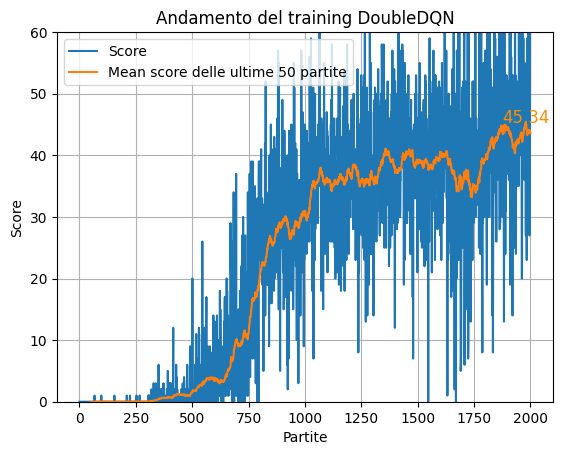

In [ ]:
agent = agent_factory.Agent_DoubleDQN(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024,
                            model_units=[250, 500], input_shape=[125], n_actions=env.n_actions)
train_result = agent.train_agent(N_GAME=2000, episode_decay=350, eps_greedy=True,
                                 update_target_model=5,
                                 directory_path="./DQN_saved_model/matrix_state/",
                                 file_name_model="model_11_DDQN.keras")
plot_trend(train_result, extra_title="DoubleDQN")

Game: 2000, Epsilon: 0.000000, Score: 51, Record: 78, Step eseguiti: 1195574. 

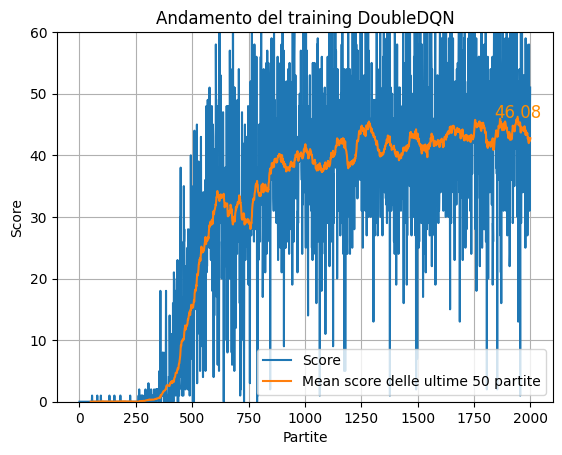

In [ ]:
agent = agent_factory.Agent_DoubleDQN(env, lr=0.001, gamma=0.95, max_memory=50_000, batch_size=1024,
                            model_units=[128, 256, 512], input_shape=[125], n_actions=env.n_actions)
train_result = agent.train_agent(N_GAME=2000, episode_decay=350, eps_greedy=True,
                                 update_target_model=5,
                                 directory_path="./DQN_saved_model/matrix_state/",
                                 file_name_model="model_11_3h_DDQN.keras")
plot_trend(train_result, extra_title="DoubleDQN")